In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

Heart Disease Dataset

In [2]:
#heart disease data set
cols =[ 'age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']
heart_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data', header = None, names = cols)
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [3]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [4]:
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [5]:
heart_data.ca.unique(),heart_data.thal.unique()

(array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object),
 array(['6.0', '3.0', '7.0', '?'], dtype=object))

In [6]:
heart_data[heart_data.ca=='?']['ca'].count(),heart_data[heart_data.thal=='?']['thal'].count()

(4, 2)

In [7]:
heart_data.replace('?',np.nan,inplace=True)

Simple Imputer

In [8]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent', add_indicator = True)
heart_data_imputed=imputer.fit_transform(heart_data)
heart_data_imputed.shape

(303, 16)

Ablone Dataset

In [9]:
#Ablone dataset
cols = ['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings']
ablone_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data',header = None, names = cols)
ablone_data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [10]:
ablone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [11]:
ablone_data = ablone_data.replace({"Sex":{"M": 1, "F": 2, "I": 3}})
ablone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   int64  
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 293.8 KB


In [12]:
y=ablone_data.pop("Rings")

In [13]:
ablone_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Sex,4177.0,1.955470,0.827815,1.0000,1.0000,2.0000,3.000,3.0000
Length,4177.0,0.523992,0.120093,0.0750,0.4500,0.5450,0.615,0.8150
Diameter,4177.0,0.407881,0.099240,0.0550,0.3500,0.4250,0.480,0.6500
Height,4177.0,0.139516,0.041827,0.0000,0.1150,0.1400,0.165,1.1300
Whole weight,4177.0,0.828742,0.490389,0.0020,0.4415,0.7995,1.153,2.8255
Shucked weight,4177.0,0.359367,0.221963,0.0010,0.1860,0.3360,0.502,1.4880
Viscera weight,4177.0,0.180594,0.109614,0.0005,0.0935,0.1710,0.253,0.7600
Shell weight,4177.0,0.238831,0.139203,0.0015,0.1300,0.2340,0.329,1.0050


Kernel Density Estimation Plot

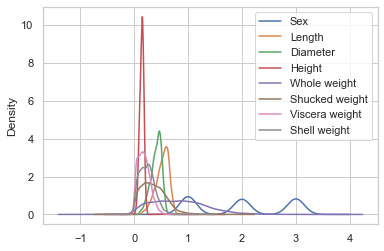

In [14]:
sns.set(style='whitegrid')
ax = ablone_data.plot.kde()    #kernel density

Box Plot

<AxesSubplot:>

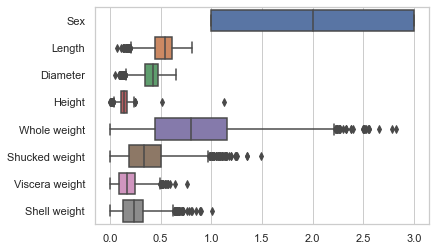

In [15]:
sns.boxplot(data = ablone_data, orient = "h")       #orient to change orientation - horizontal/vertical

Violin Plot

<AxesSubplot:>

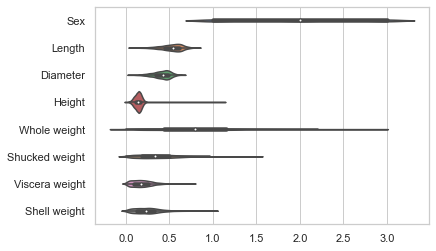

In [16]:
sns.violinplot(data = ablone_data, orient = "h")   #KDE + boxplot

MaxAbsScaler


<AxesSubplot:>

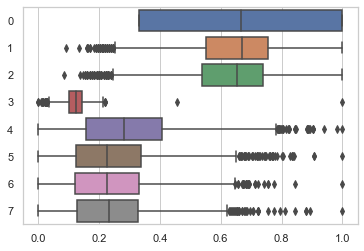

In [17]:
from sklearn.preprocessing import MaxAbsScaler
x=ablone_data
mas=MaxAbsScaler()
x_new=mas.fit_transform(x)
sns.boxplot(data = x_new, orient = "h")

MinMaxScaler

<AxesSubplot:>

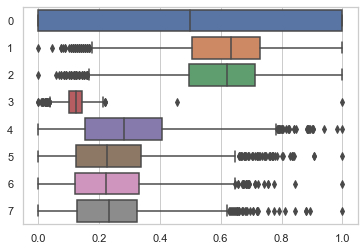

In [18]:
from sklearn.preprocessing import MinMaxScaler
x=ablone_data
mms=MinMaxScaler()
x_new=mms.fit_transform(x)
sns.boxplot(data = x_new, orient = "h")

StandardScaler

<AxesSubplot:>

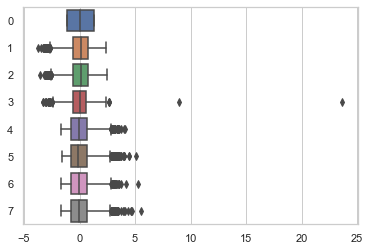

In [19]:
from sklearn.preprocessing import StandardScaler
x=ablone_data
ss=StandardScaler()
x_new=ss.fit_transform(x)
sns.boxplot(data = x_new, orient = "h")

Add Dummy Feature

In [20]:
from sklearn.preprocessing import add_dummy_feature
x=np.array([4,3,3,5,6,7,5,3,7,8,5]).reshape(-1,1)
add_dummy_feature(x)


array([[1., 4.],
       [1., 3.],
       [1., 3.],
       [1., 5.],
       [1., 6.],
       [1., 7.],
       [1., 5.],
       [1., 3.],
       [1., 7.],
       [1., 8.],
       [1., 5.]])

Wine Quality Data

In [21]:

wine_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep = ";")
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [22]:
wine_data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


Custom Transformer

In [23]:
from sklearn.preprocessing import FunctionTransformer
transformer=FunctionTransformer(np.log1p,validate=True)
wine_data_trans=transformer.transform(np.array(wine_data))
pd.DataFrame(wine_data_trans,columns=wine_data.columns).describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,2.215842,0.178100,1.722767,2.091864,2.186051,2.322388,2.827314
volatile acidity,1599.0,0.417173,0.114926,0.113329,0.329304,0.418710,0.494696,0.947789
citric acid,1599.0,0.228147,0.152423,0.000000,0.086178,0.231112,0.350657,0.693147
residual sugar,1599.0,1.218131,0.269969,0.641854,1.064711,1.163151,1.280934,2.803360
chlorides,1599.0,0.083038,0.038991,0.011929,0.067659,0.076035,0.086178,0.476855
free sulfur dioxide,1599.0,2.639013,0.623790,0.693147,2.079442,2.708050,3.091042,4.290459
total sulfur dioxide,1599.0,3.634750,0.682575,1.945910,3.135494,3.663562,4.143135,5.669881
density,1599.0,0.691519,0.000945,0.688170,0.690945,0.691521,0.692064,0.694990
pH,1599.0,1.460557,0.035760,1.319086,1.437463,1.460938,1.481605,1.611436
sulphates,1599.0,0.501073,0.093731,0.285179,0.438255,0.482426,0.548121,1.098612


Polynomial Features

In [24]:
from sklearn.preprocessing import PolynomialFeatures
wine_data_copy=wine_data.copy()
wine_data_copy=wine_data_copy.drop(['quality'],axis=1)
print("Before : ", wine_data_copy.shape)

poly=PolynomialFeatures(degree=2)
poly_wine=poly.fit_transform(wine_data_copy)
print("After : ",poly_wine.shape)

Before :  (1599, 11)
After :  (1599, 78)


In [25]:
poly.get_feature_names

<bound method PolynomialFeatures.get_feature_names of PolynomialFeatures()>

Discretization - Continuos Variables to Discrete Bins

In [26]:
from sklearn.preprocessing import KBinsDiscretizer
enc=KBinsDiscretizer(n_bins=10,encode='onehot')
X=np.array(wine_data["chlorides"]).reshape(-1,1)
X_binned=enc.fit_transform(X)
X_binned.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

Handling Categorical Features

In [27]:
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
cols = ['sepal length','sepal width','petal length','petal width','label']
iris_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header = None, names = cols)
iris_data.head()

,sepal length,sepal width,petal length,petal width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [28]:
iris_data.label.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [29]:
onehot=OneHotEncoder(categories="auto")
print("Before : ",iris_data.label.shape)
iris_labels=onehot.fit_transform(iris_data.label.values.reshape(-1,1))
print("After : ",iris_labels.shape)

Before :  (150,)
After :  (150, 3)


In [30]:
ord_enc=OrdinalEncoder()
iris_labels=np.array(iris_data['label'])
iris_trans=ord_enc.fit_transform(iris_labels.reshape(-1,1))
np.unique(iris_trans)


array([0., 1., 2.])

Label Encoder

In [31]:
from sklearn.preprocessing import LabelEncoder
iris_labels=np.array(iris_data['label'])
lab_enc=LabelEncoder()
iris_int=lab_enc.fit_transform(iris_labels)
iris_int

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Multi-Label Binarizer

In [32]:
movie_genres = [{'action','comedy'},
                {'comedy'},
                {'action','thriller'},
                {'scifi','action','thriller'}]

In [33]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
mlb.fit_transform(movie_genres)

array([[1, 1, 0, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 1],
       [1, 0, 1, 1]])

Using Pandas Dummy Variables

In [34]:
iris_data_onehot = pd.get_dummies(iris_data, columns = ['label'], prefix = ['one_hot'])
iris_data_onehot

,sepal length,sepal width,petal length,petal width,one_hot_Iris-setosa,one_hot_Iris-versicolor,one_hot_Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


Composite Transformers

In [35]:
x = np.array([[20.0, 'male'],[10.0, 'female']])
x

array([['20.0', 'male'],
       ['10.0', 'female']], dtype='<U32')

In [36]:
from sklearn.compose import ColumnTransformer
ct=ColumnTransformer([('scalar',MaxAbsScaler(),[0]),('pass','passthrough',[0]),('encoder',OneHotEncoder(),[1])])
ct.fit_transform(x)

array([['1.0', '20.0', '0.0', '1.0'],
       ['0.5', '10.0', '1.0', '0.0']], dtype='<U32')

Transformed Target Regressor

In [37]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

X,y=fetch_california_housing(return_X_y=True)
X,y=X[:2000,:],y[:2000]
transformer=MaxAbsScaler()
regressor=LinearRegression()
regr=TransformedTargetRegressor(regressor=regressor,transformer=transformer)
X_train, X_test, y_train, y_test = train_test_split(X,y)
regr.fit(X_train, y_train)
raw_target_regr = LinearRegression().fit(X_train, y_train)
print(regr.score(X_test, y_test),raw_target_regr.score(X_test, y_test))


0.7489958169719619 0.748995816971962


Feature Selection

In [38]:
data = [{'age': 4, 'height': 96.0},
        {'age': 1, 'height': 73.9},
        {'age': 3, 'height': 88.9},
        {'age': 2, 'height': 81.6}]

In [39]:
from sklearn.feature_extraction import DictVectorizer
dv=DictVectorizer(sparse = False)
data_transformed=dv.fit_transform(data)
data_transformed

array([[ 4. , 96. ],
       [ 1. , 73.9],
       [ 3. , 88.9],
       [ 2. , 81.6]])

In [40]:
from sklearn.feature_selection import VarianceThreshold
vt=VarianceThreshold(threshold=2)
data_new=vt.fit_transform(data_transformed)
data_new

array([[96. ],
       [73.9],
       [88.9],
       [81.6]])

Select K Best

In [41]:
from sklearn.feature_selection import SelectKBest,mutual_info_regression
X_california, y_california = fetch_california_housing(return_X_y = True)

X,y = X_california[:2000,:], y_california[:2000]

print(f'Shape of feature matrix: {X.shape}')

Shape of feature matrix: (2000, 8)


In [42]:
skb=SelectKBest(mutual_info_regression,k=3)
X_new=skb.fit_transform(X,y)
X_new.shape,skb.get_support()

((2000, 3), array([ True, False, False, False, False, False,  True,  True]))

Select Percentile

In [43]:
#select top 30 percentile features
from sklearn.feature_selection import SelectPercentile
sp = SelectPercentile(mutual_info_regression, percentile = 30)
X_new = sp.fit_transform(X,y)
print(f'Shape after feature selection: {X_new.shape}')

Shape after feature selection: (2000, 3)


In [44]:
sp.get_support()

array([ True, False, False, False, False, False,  True,  True])

Generate Unnivarate Select

In [45]:
from sklearn.feature_selection import GenericUnivariateSelect
gus = GenericUnivariateSelect(mutual_info_regression, mode = 'k_best', param = 3)
X_new = gus.fit_transform(X,y)
print(f'Shape after feature selection: {X_new.shape}')

Shape after feature selection: (2000, 3)


# Wrapper Based Methods

Recursive Feature Elimination

In [47]:
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE

est=LinearRegression()
selector=RFE(est,n_features_to_select=3,step=1)
selector.fit(X,y)
selector.support_,selector.ranking_

(array([ True, False, False, False, False, False,  True,  True]),
 array([1, 5, 4, 3, 6, 2, 1, 1]))

In [48]:
X_new=selector.transform(X)
X_new.shape

(2000, 3)

Select From Model

In [49]:
from sklearn.feature_selection import SelectFromModel
estimator = LinearRegression()
estimator.fit(X,y)
print(f'Coeff of features: {estimator.coef_}')
print(f'Indices of top {3} features: {np.argsort(estimator.coef_)[-3:]}')
t = np.argsort(np.abs(estimator.coef_))[-3:]
model = SelectFromModel(estimator, max_features = 3, prefit = True)
X_new = model.transform(X)
print(f'Shape after feature selection: {X_new.shape}')

Coeff of features: [ 3.64048292e-01  5.56221906e-03  5.13591243e-02 -1.64474348e-01
  5.90411479e-05 -1.64573915e-01 -2.17724525e-01 -1.85343265e-01]
Indices of top 3 features: [1 2 0]
Shape after feature selection: (2000, 3)


Sequential Feature Selection

In [55]:
from sklearn.feature_selection import SequentialFeatureSelector #Selects features one by one in a greedy manner
estimator =LinearRegression()
sfs = SequentialFeatureSelector(estimator,n_features_to_select=3,direction="forward")
sfs.fit_transform(X,y)
sfs.get_support()

array([ True, False, False, False, False,  True,  True, False])

In [56]:
estimator =LinearRegression()
sfs = SequentialFeatureSelector(estimator,n_features_to_select=3,direction="backward")
sfs.fit_transform(X,y)
sfs.get_support()

array([ True, False, False, False, False,  True,  True, False])

Principal Component Analysis

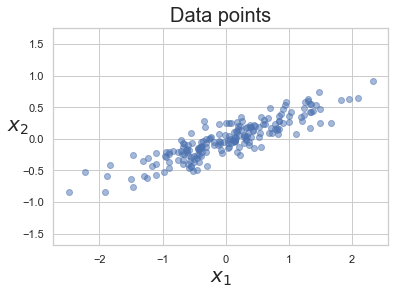

In [63]:
#@title [Generate synthetic dataset]
rand = np.random.RandomState(1)
X = np.dot(rand.rand(2, 2), rand.randn(2, 200)).T

plt.figure()
plt.title('Data points', size = 20)

# set x and y labels
plt.xlabel('$x_1$', size=20)
plt.ylabel('$x_2$', size=20, rotation = 0)

# plot the data points
plt.scatter(X[:, 0], X[:, 1], alpha=0.5)
plt.axis('equal');

In [64]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X),pca.components_,pca.explained_variance_,pca.mean_

(PCA(n_components=2),
 array([[-0.94446029, -0.32862557],
        [-0.32862557,  0.94446029]]),
 array([0.7625315, 0.0184779]),
 array([ 0.03351168, -0.00408072]))

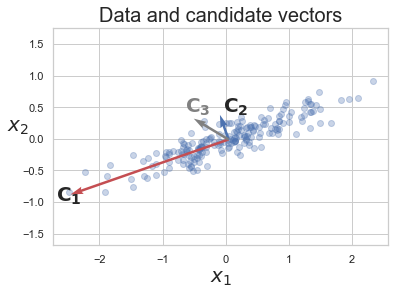

In [65]:
#@title [Visualize principal components]

# set x and y labels

plt.figure()

plt.title('Data and candidate vectors', size = 20)

plt.xlabel('$x_1$', size=20)

plt.ylabel('$x_2$', size=20, rotation = 0)

# plot data points

plt.scatter(X[:, 0], X[:, 1], alpha=0.3)

for length, principal_axis, axis_name, i_color in zip(pca.explained_variance_, 

                                    pca.components_, 

                                    ['$\mathbf{C_1}$','$\mathbf{C_2}$'],

                                    ['r','b']):

    v = principal_axis * np.sqrt(length)

    v0, v1 = pca.mean_, pca.mean_ + v

    # draw principal axis

    plt.quiver(*v0,*(v1-v0),scale=0.33, scale_units='xy', color=i_color)

    # label the  principal axis

    plt.text(*(3.4*v1), axis_name, size = 20)

# draw 3rd component

lengths = np.eye(2)

np.fill_diagonal(lengths, np.sqrt(pca.explained_variance_))

c3 = pca.mean_+[-0.5,0.3]

plt.quiver(*pca.mean_,

           *(1.1*(c3-pca.mean_)),

           scale=1,

           scale_units='xy',

           color='grey')

# label the  principal axis

plt.text(*(1.4*c3), 

         '$\mathbf{C_3}$', 

         size = 20,

         color='grey')

plt.axis('equal')

plt.show()

# Chaining Transformers

Pipeline

In [67]:
from sklearn.pipeline import Pipeline
estimators=[('simpleImputer',SimpleImputer()),('standardScaler',StandardScaler()),]
pipe=Pipeline(steps=estimators)

In [68]:
from sklearn.pipeline import make_pipeline
pipe=make_pipeline(SimpleImputer(),StandardScaler())

In [70]:
estimators=[('simpleImputer',SimpleImputer()),
            ('pca',PCA(n_components=2)),
            ('regressor',LinearRegression())
            ]
pipe=Pipeline(steps=estimators)
#pipe.set_params(pca__n_components=2)

Grid Search with Pipeline

In [72]:
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = dict(imputer=['passthrough',
                    SimpleImputer(),
                    KNNImputer()],
                    clf=[SVC(),LogisticRegression()],
                    clf__C=[0.1,10,100])
grid_search=GridSearchCV(pipe,param_grid=param_grid)

Caching Transformers

In [73]:
import tempfile
tempDirPath=tempfile.TemporaryDirectory()

In [74]:
estimators=[('simpleImputer',SimpleImputer()),
            ('pca',PCA(2)),
            ('regressor',LinearRegression())
            ]
pipe=Pipeline(steps=estimators,memory=tempDirPath)

Feature Union

In [75]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.pipeline import FeatureUnion
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([('selector',ColumnTransformer([('select_first_4',
                                                        'passthrough',
                                                        slice(0,4))])),
                        ('imputer',SimpleImputer(strategy="median")),
                        ('std_scaler',StandardScaler()),
                        ])
cat_pipeline=ColumnTransformer([('label_binarizer',LabelBinarizer(),[4]),
                                ])
full_pipeline=FeatureUnion(transformer_list=
                            [("num_pipeline",num_pipeline),
                            ("cat_pipeline",cat_pipeline),
                            ])

In [76]:
from sklearn import set_config
set_config(display='diagram')
full_pipeline

FeatureUnion(transformer_list=[('num_pipeline',
                                Pipeline(steps=[('selector',
                                                 ColumnTransformer(transformers=[('select_first_4',
                                                                                  'passthrough',
                                                                                  slice(0, 4, None))])),
                                                ('imputer',
                                                 SimpleImputer(strategy='median')),
                                                ('std_scaler',
                                                 StandardScaler())])),
                               ('cat_pipeline',
                                ColumnTransformer(transformers=[('label_binarizer',
                                                                 LabelBinarizer(),
                                                                 [4])]))])

# Handling Imbalanced Data

Undersampling

In [78]:
!

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\scikit_learn-0.24.2.dist-info\\COPYING'
Consider using the `--user` option or check the permissions.




  Using cached imbalanced_learn-0.9.0-py3-none-any.whl (199 kB)
  Using cached scikit_learn-1.0.2-cp39-cp39-win_amd64.whl (7.2 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:


In [83]:
import imbalanced_learn

ModuleNotFoundError: No module named 'imbalanced_learn'